# Forecasting number of sales on the unit sales for thousands of items sold at different Favorita stores.

For implementing algorithms, there are 7 datasets that's needed to be preprocessed and analysed.

## Analysis of holiday events dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
holidays_events = pd.read_csv("data/holidays_events.csv")
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


**Dataset has no null values**

In [8]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

**Researching dataset's columns: counting amount of unique values and showing them.**

*Hypothesis: holiday day (type: holiday) may have impact on sales and locale's values are also potentially beneficial for analysis if not transered.*

In [9]:
holidays_events.nunique(axis=0)

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [11]:
types = pd.unique(holidays_events["type"])
types

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [13]:
locales = pd.unique(holidays_events["locale"])
locales

array(['Local', 'Regional', 'National'], dtype=object)

In [14]:
locale_names = pd.unique(holidays_events["locale_name"])
locale_names

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [15]:
descriptions = pd.unique(holidays_events["description"])
descriptions

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

**Categorical diagramms and inference**

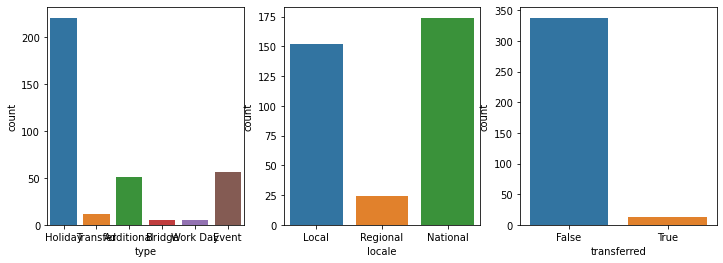

In [30]:
_, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.countplot(x="type", data=holidays_events, ax=axes[0])
sns.countplot(x="locale", data=holidays_events, ax=axes[1]);
sns.countplot(x="transferred", data=holidays_events, ax=axes[2]);

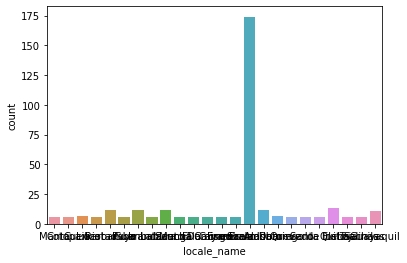

In [32]:
sns.countplot(x="locale_name", data=holidays_events);

## Analysis of oil prices dataset

In [16]:
oil = pd.read_csv("data/oil.csv")
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


**The dataset has 43 null values and taking the mean of 4 previous values and 4 following values is necessary.**

In [17]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64